<a href="https://colab.research.google.com/github/felixlys/CNNandResNet_BrainTumor/blob/main/BrainCancerClassificationCNN_Extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from os import environ
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import PIL.Image
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from IPython.display import display, Image
from tkinter import *
from PIL import ImageTk, Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/archive(1).zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

In [ ]:
import os
import pandas as pd

def create_dataframe(directory, label):
    filepaths = []
    labels = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        filepaths.append(filepath)
        labels.append(label)

    df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
    return df

# Definisikan direktori untuk setiap jenis tumor
glioma_dir_test = r'/content/Testing/glioma_tumor'
meningioma_dir_test = r'/content/Testing/meningioma_tumor'
no_tumor_dir_test = r'/content/Testing/no_tumor'
pituitary_tumor_dir_test = r'/content/Testing/pituitary_tumor'
glioma_dir_train = r'/content/Training/glioma_tumor'
meningioma_dir_train = r'/content/Training/meningioma_tumor'
no_tumor_dir_train = r'/content/Training/no_tumor'
pituitary_tumor_dir_train = r'/content/Training/pituitary_tumor'

# Buat DataFrame untuk setiap jenis tumor di set pengujian
df_glioma_test = create_dataframe(glioma_dir_test, 'glioma_tumor')
df_meningioma_test = create_dataframe(meningioma_dir_test, 'meningioma_tumor')
df_no_tumor_test = create_dataframe(no_tumor_dir_test, 'no_tumor')
df_pituitary_tumor_test = create_dataframe(pituitary_tumor_dir_test, 'pituitary_tumor')

# Buat DataFrame untuk setiap jenis tumor di set pelatihan
df_glioma_train = create_dataframe(glioma_dir_train, 'glioma_tumor')
df_meningioma_train = create_dataframe(meningioma_dir_train, 'meningioma_tumor')
df_no_tumor_train = create_dataframe(no_tumor_dir_train, 'no_tumor')
df_pituitary_tumor_train = create_dataframe(pituitary_tumor_dir_train, 'pituitary_tumor')

# Gabungkan DataFrame untuk set pengujian
df_test = pd.concat([df_glioma_test, df_meningioma_test, df_no_tumor_test, df_pituitary_tumor_test], ignore_index=True)

# Gabungkan DataFrame untuk set pelatihan
df_train = pd.concat([df_glioma_train, df_meningioma_train, df_no_tumor_train, df_pituitary_tumor_train], ignore_index=True)

# Tampilkan hasilnya
print("DataFrame for Testing Set:")
print(df_test.head())
print(df_test["labels"].value_counts())
print("\nDataFrame for Training Set:")
print(df_train.head())
print(df_train["labels"].value_counts())


DataFrame for Testing Set:
                                     filepaths        labels
0  /content/Testing/glioma_tumor/image(23).jpg  glioma_tumor
1  /content/Testing/glioma_tumor/image(90).jpg  glioma_tumor
2  /content/Testing/glioma_tumor/image(36).jpg  glioma_tumor
3  /content/Testing/glioma_tumor/image(81).jpg  glioma_tumor
4  /content/Testing/glioma_tumor/image(58).jpg  glioma_tumor
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: labels, dtype: int64

DataFrame for Training Set:
                                     filepaths        labels
0  /content/Training/glioma_tumor/gg (735).jpg  glioma_tumor
1  /content/Training/glioma_tumor/gg (672).jpg  glioma_tumor
2  /content/Training/glioma_tumor/gg (340).jpg  glioma_tumor
3  /content/Training/glioma_tumor/gg (771).jpg  glioma_tumor
4  /content/Training/glioma_tumor/gg (641).jpg  glioma_tumor
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor         

In [ ]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)
print(df_combined.head())
print(df_combined["labels"].value_counts())

                                     filepaths        labels
0  /content/Training/glioma_tumor/gg (735).jpg  glioma_tumor
1  /content/Training/glioma_tumor/gg (672).jpg  glioma_tumor
2  /content/Training/glioma_tumor/gg (340).jpg  glioma_tumor
3  /content/Training/glioma_tumor/gg (771).jpg  glioma_tumor
4  /content/Training/glioma_tumor/gg (641).jpg  glioma_tumor
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: labels, dtype: int64


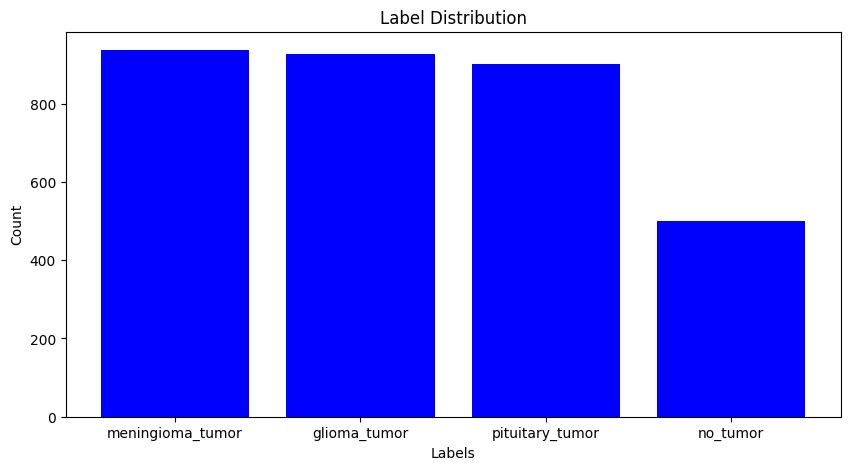

In [ ]:
#Data Distribution
label_distribution_data = df_combined["labels"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(label_distribution_data.index, label_distribution_data.values, color='blue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
train_images, test_images = train_test_split(df_combined, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(df_combined, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2611, 2)
(653, 2)
(653, 2)
(2611, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Augmentasi data
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)

# Set data augmentasi untuk set pelatihan
train = image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(512, 512),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Set data augmentasi untuk set pengujian
test = image_gen.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=(512, 512),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Set data augmentasi untuk set validasi
val = image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(512, 512),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 2611 validated image filenames belonging to 4 classes.
Found 653 validated image filenames belonging to 4 classes.
Found 653 validated image filenames belonging to 4 classes.


In [ ]:
#untuk menampilkan augmened data
def show_brain_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(16,16))
    length = len(labels)
    r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="blue",fontsize=16)
        plt.axis('off')
    plt.show()

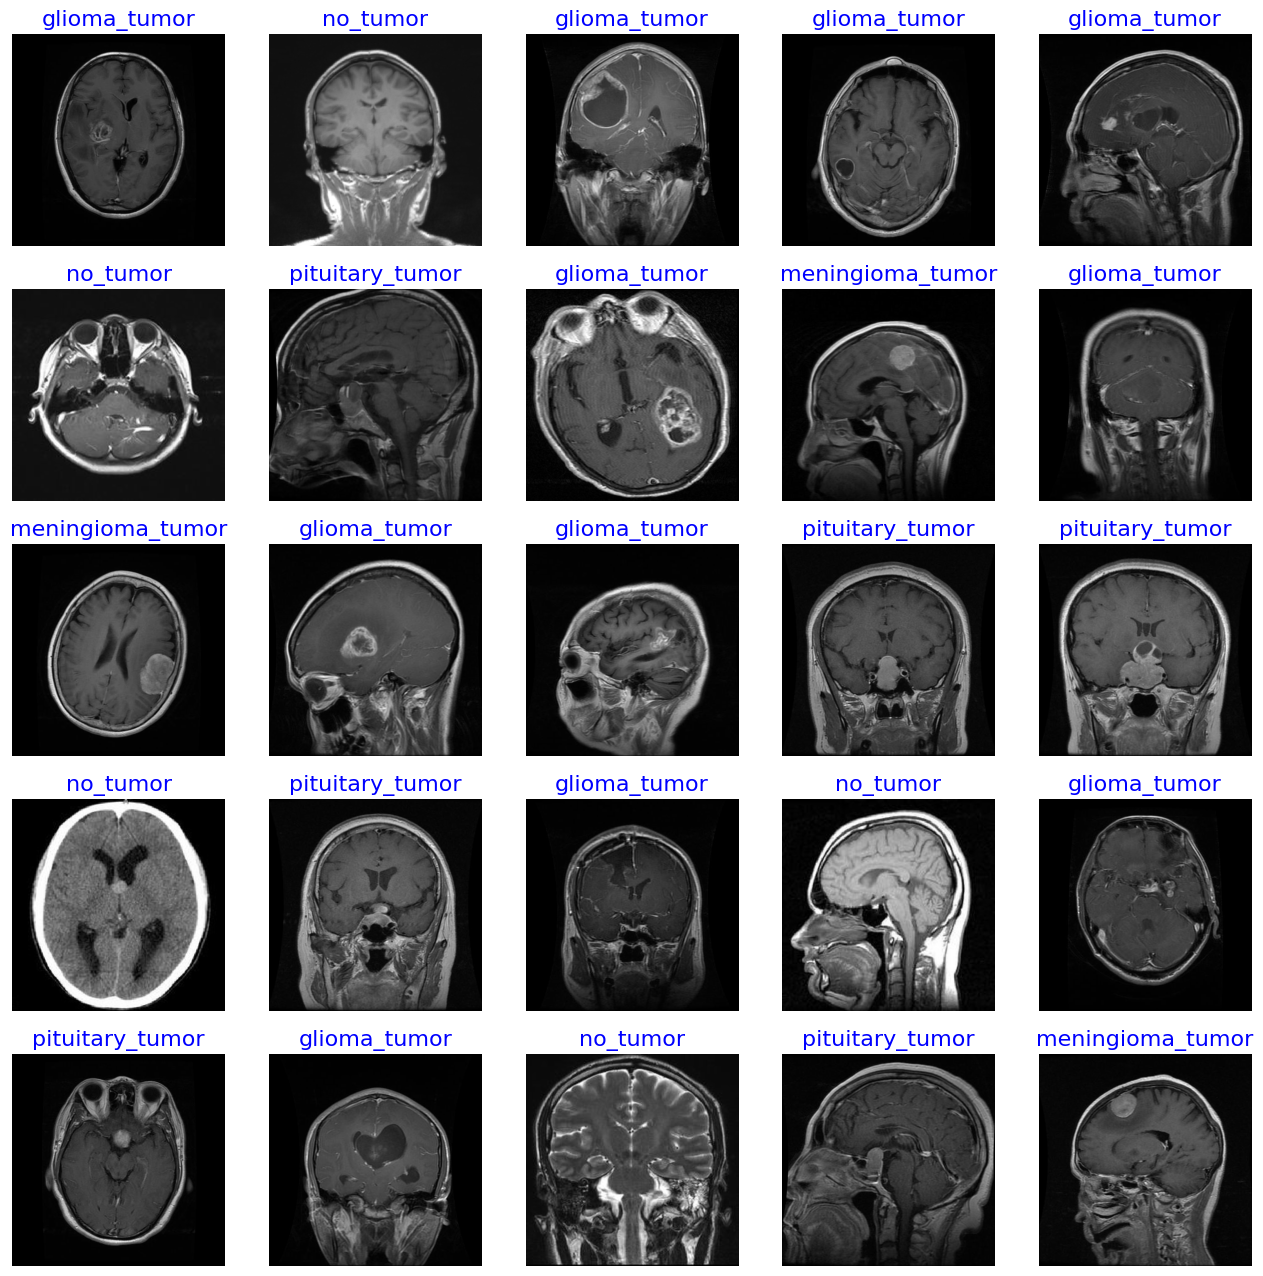

In [ ]:
show_brain_images(train)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512,512, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 508, 508, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 254, 254, 64)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 254, 254, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 252, 252, 64)      36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 250, 250, 64)      36928     
                                                      

In [ ]:
History = model.fit(train, validation_data= test, epochs=60,verbose=1)

Epoch 1/60
82/82 [==============================] - 166s 2s/step - loss: 1.3182 - accuracy: 0.3638 - val_loss: 1.3333 - val_accuracy: 0.5268
Epoch 2/60
82/82 [==============================] - 135s 2s/step - loss: 1.1462 - accuracy: 0.5029 - val_loss: 1.2257 - val_accuracy: 0.4426
Epoch 3/60
82/82 [==============================] - 137s 2s/step - loss: 1.0173 - accuracy: 0.5760 - val_loss: 1.0994 - val_accuracy: 0.5896
Epoch 4/60
82/82 [==============================] - 140s 2s/step - loss: 0.8829 - accuracy: 0.6465 - val_loss: 1.0036 - val_accuracy: 0.6294
Epoch 5/60
82/82 [==============================] - 141s 2s/step - loss: 0.7738 - accuracy: 0.6944 - val_loss: 0.9454 - val_accuracy: 0.6355
Epoch 6/60
82/82 [==============================] - 141s 2s/step - loss: 0.6870 - accuracy: 0.7319 - val_loss: 0.8577 - val_accuracy: 0.6953
Epoch 7/60
82/82 [==============================] - 136s 2s/step - loss: 0.6077 - accuracy: 0.7717 - val_loss: 0.8379 - val_accuracy: 0.6953
Epoch 8/60
82

Text(0.5, 1.0, 'Training and Validation Accuracy')

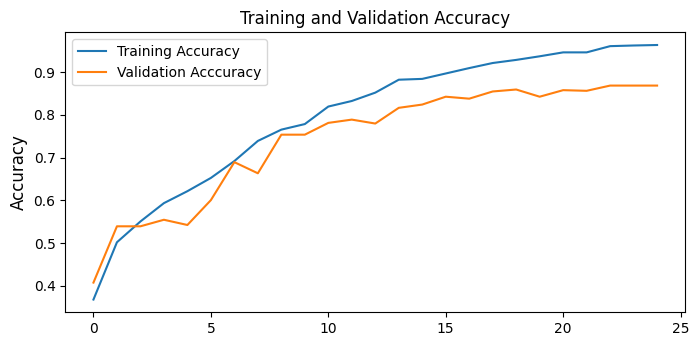

In [ ]:
acc = History.history["accuracy"] # Report of model
val_acc = History.history["val_accuracy"] # History of validation data

loss = History.history["loss"]        # Training loss
val_loss = History.history["val_loss"] # Validation loss

plt.figure(figsize=(8,8))
plt.subplot(2,1,1) # 2 rows and 1 columns
#Plotting respective accuracy
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc, label="Validation Acccuracy")

plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)

In [ ]:
model.evaluate(test, verbose=1)

21/21 [==============================] - 5s 239ms/step - loss: 0.4520 - accuracy: 0.8683


[0.4520410895347595, 0.8683001399040222]

Text(0.5, 1.0, 'Training and Validation Losses')

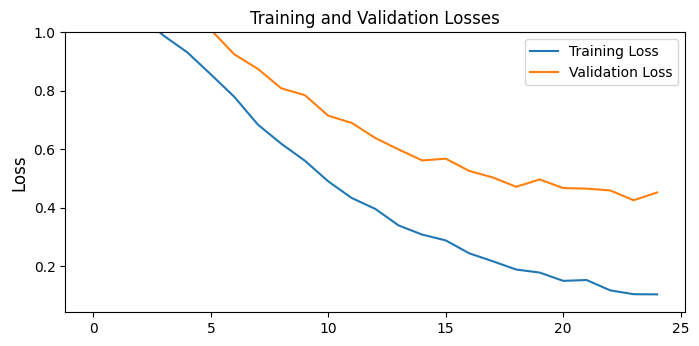

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)

plt.plot(loss, label="Training Loss")      #Training loss
plt.plot(val_loss, label="Validation Loss") # Validation Loss

plt.legend()
plt.ylim([min(plt.ylim()),1])
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Losses", fontsize=12)

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

21/21 [==============================] - 5s 247ms/step


In [ ]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.82      0.86       219
meningioma_tumor       0.80      0.85      0.82       187
        no_tumor       0.91      0.84      0.87        87
 pituitary_tumor       0.89      0.97      0.93       160

        accuracy                           0.87       653
       macro avg       0.88      0.87      0.87       653
    weighted avg       0.87      0.87      0.87       653

Accuracy of the Model: 86.83001531393569 %


<Axes: >

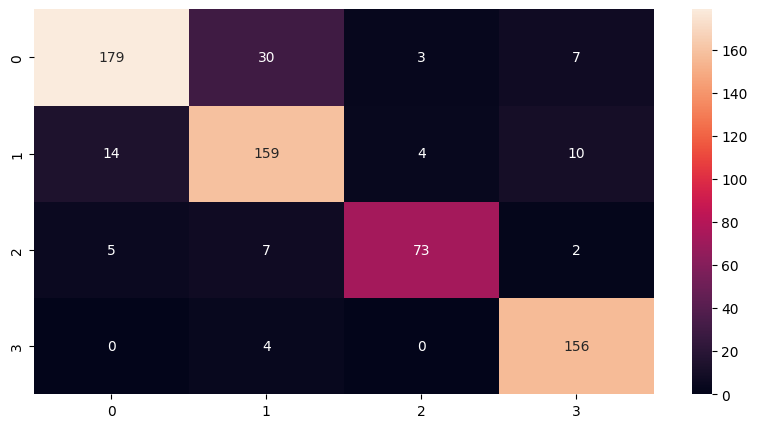

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')
#cmap='Greens'
#0 :

82/82 [==============================] - 31s 361ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.95      0.97       707
meningioma_tumor       0.96      0.97      0.96       750
        no_tumor       1.00      0.97      0.99       413
 pituitary_tumor       0.96      1.00      0.98       741

        accuracy                           0.97      2611
       macro avg       0.98      0.97      0.97      2611
    weighted avg       0.97      0.97      0.97      2611

Accuracy of the Model: 97.24243584833397 %


<Axes: >

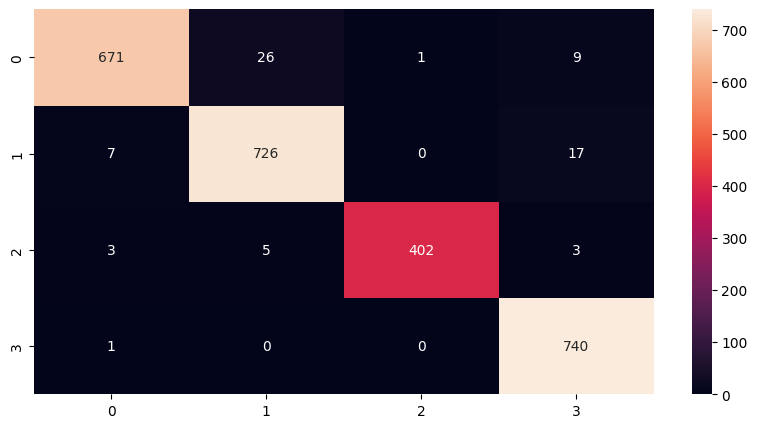

In [ ]:
#akurasi training
pred1 = model.predict(train)
pred1 = np.argmax(pred1, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred1]
y_test1 = train_images.labels # set y_test to the expected output
print(classification_report(y_test1, pred2))
print("Accuracy of the Model:",accuracy_score(y_test1, pred2)*100,"%")
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test1, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')
#cmap='Greens'
#0 :